# <center>Batch Normalization assignment</center>

## Q : 1 

## Ans : 1) 

A: Batch normalization is a technique used in artificial neural networks to improve the training stability and speed. It operates by normalizing the inputs of each layer, specifically the outputs of neurons within a mini-batch, before passing them to the next layer in the network. This normalization helps in mitigating issues like vanishing or exploding gradients, which are common problems during the training of deep networks. By ensuring that inputs to each layer have a mean of 0 and a standard deviation of 1, batch normalization helps in making the training process more stable and efficient.

## Ans : 2)

A: There are several benefits to using batch normalization during training:

Stability: Batch normalization helps in stabilizing the learning process by reducing the likelihood of vanishing or exploding gradients. This stability allows for the use of higher learning rates, accelerating the convergence of the network.

Faster Convergence: Normalizing inputs to each layer ensures that the optimization algorithm converges faster, leading to a quicker training process.

Reduction of Dependency on Initialization: Batch normalization reduces the sensitivity of neural networks to weight initialization choices. This means that network weights can be initialized more liberally without risking convergence issues.

Regularization Effect: Batch normalization acts as a regularizer, reducing the need for other regularization techniques such as dropout. It adds a slight noise during training, which can be seen as a form of implicit regularization, improving the model's generalization ability.

Allows for Deeper Networks: With batch normalization, deeper neural networks can be trained more effectively. It enables the training of networks with more layers, leading to the potential for capturing intricate patterns in data.



## Ans : 3)


A: Batch normalization operates as follows:

Normalization Step: For each feature in the mini-batch, batch normalization normalizes the values by subtracting the mean of the batch and dividing by the standard deviation of the batch. This centers the data around zero and scales it.

Scaling and Shifting: After normalization, the data is scaled by a learnable parameter (gamma) and shifted by another learnable parameter (beta). These parameters allow the model to learn the optimal scale and mean for each feature, introducing flexibility into the normalization process.

Learnable Parameters: Gamma and beta are learnable parameters, optimized during the training process via backpropagation. They allow the network to decide whether to use the normalized version of the data or revert to the original representations, providing the model with the flexibility to learn complex patterns.

In summary, batch normalization not only normalizes the inputs, making the training more stable, but also introduces these learnable parameters, enabling the network to adapt and decide the best representation for each feature, enhancing the overall learning process.







## Q : 2 

In [1]:


### Import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Dense , BatchNormalization , Flatten , Dropout 
from tensorflow.keras.models import Sequential 

### import dataset 

from tensorflow.keras.datasets import mnist

In [2]:
(X_train_full , y_train_full),(X_test , y_test ) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
len(np.unique(y_test))

10

In [8]:
## scalling of data 

X_train_full = X_train_full/255
X_test = X_test/255

## split into train and validation 

X_train , X_val = X_train_full[:55000],X_train_full[55000:]
y_train , y_val = y_train_full[:55000],y_train_full[55000:]

In [9]:
## validation_set 

validation_set = (X_val , y_val)

In [10]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(300,activation = 'relu'),
    Dense(100, activation = 'relu'),
    Dense(10 , activation = 'softmax')
    
])

model.compile( loss = 'sparse_categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

history  = model.fit(X_train , y_train , validation_data = validation_set , epochs = 30 ) 

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2180 - accuracy: 0.9351 - val_loss: 0.1109 - val_accuracy: 0.9672
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0906 - accuracy: 0.9719 - val_loss: 0.0810 - val_accuracy: 0.9768
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9804 - val_loss: 0.0605 - val_accuracy: 0.9814
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9851 - val_loss: 0.0939 - val_accuracy: 0.9748
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0686 - val_accuracy: 0.9802
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.0837 - val_accuracy: 0.9810
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9922 - val_loss: 0.0711 - val_accuracy:

In [17]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.218014,0.935091,0.110945,0.9672
1,0.090560,0.971945,0.080974,0.9768
2,0.060505,0.980382,0.060512,0.9814
3,0.044945,0.985055,0.093898,0.9748
4,0.034930,0.988473,0.068622,0.9802
5,0.027252,0.990836,0.083684,0.9810
6,0.023405,0.992182,0.071120,0.9814
7,0.020440,0.993145,0.084028,0.9804
8,0.018124,0.993764,0.082227,0.9812
9,0.013493,0.995491,0.104903,0.9810


<AxesSubplot:>

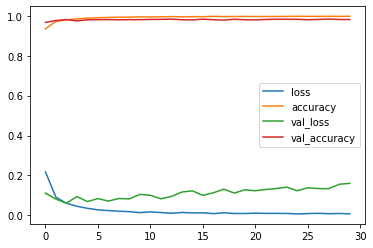

In [18]:
df.plot()

### Inference : 

- Accuracy : 0.9818
- Loss : 0.1601

In [11]:
model_1 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(300,activation = 'relu'),
    BatchNormalization(),
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10 , activation = 'softmax')
    
])

model_1.compile( loss = 'sparse_categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

history_1 = model_1.fit(X_train , y_train , validation_data = validation_set , epochs = 30 ) 


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2182 - accuracy: 0.9351 - val_loss: 0.0907 - val_accuracy: 0.9728
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1109 - accuracy: 0.9657 - val_loss: 0.0798 - val_accuracy: 0.9770
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0853 - accuracy: 0.9738 - val_loss: 0.0889 - val_accuracy: 0.9750
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.9774 - val_loss: 0.0750 - val_accuracy: 0.9808
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0617 - accuracy: 0.9798 - val_loss: 0.0760 - val_accuracy: 0.9782
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0866 - val_accuracy: 0.9780
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0442 - accuracy: 0.9850 - val_loss: 0.0816 - val_accuracy:

In [22]:
df1=pd.DataFrame(history_1.history)
df1

,loss,accuracy,val_loss,val_accuracy
0,0.218234,0.935127,0.090676,0.9728
1,0.110933,0.965673,0.079775,0.9770
2,0.085350,0.973764,0.088921,0.9750
3,0.070629,0.977400,0.074953,0.9808
4,0.061674,0.979836,0.076003,0.9782
5,0.048967,0.984327,0.086583,0.9780
6,0.044155,0.984964,0.081605,0.9794
7,0.039387,0.986618,0.072533,0.9806
8,0.033139,0.988600,0.073607,0.9796
9,0.032476,0.988982,0.079083,0.9782


<AxesSubplot:>

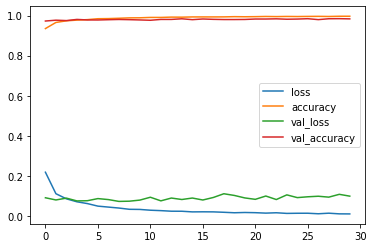

In [23]:
df1.plot()

## Inference : 

- accuracy : 0.9836
- loss :  0.0987 

## Conclusion : 

`We reduced loss and achieved good accuracy by appliying batch normalization`
### Before : 

- Accuracy : 0.9818
- Loss : 0.1601

### After  : 

- accuracy : 0.9836
- loss :  0.0987 


- We can see that before apply batch normalizatioan accuracy of model is less and also loss was higher after apply normalization accuracy increased and also loss reduced.
- We can also see that before there is unstability in validation and training loss but after apply batch normalization losses are stable and constant.

## Q : 3)

In [12]:
## Q : 3)

model_2 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(300,activation = 'relu'),
    BatchNormalization(),
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10 , activation = 'softmax')
    
])

model_2.compile( loss = 'sparse_categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

history_2 = model_2.fit(X_train , y_train , validation_data = validation_set , epochs = 30 , batch_size = 2 ) 


Epoch 1/30
27500/27500 [==============================] - 54s 2ms/step - loss: 1.2610 - accuracy: 0.6202 - val_loss: 0.8114 - val_accuracy: 0.8606
Epoch 2/30
27500/27500 [==============================] - 49s 2ms/step - loss: 1.0773 - accuracy: 0.6984 - val_loss: 1.3416 - val_accuracy: 0.8524
Epoch 3/30
27500/27500 [==============================] - 50s 2ms/step - loss: 1.0129 - accuracy: 0.7212 - val_loss: 2.7183 - val_accuracy: 0.8682
Epoch 4/30
27500/27500 [==============================] - 50s 2ms/step - loss: 0.9599 - accuracy: 0.7421 - val_loss: 3.4984 - val_accuracy: 0.8586
Epoch 5/30
27500/27500 [==============================] - 49s 2ms/step - loss: 0.9370 - accuracy: 0.7514 - val_loss: 5.1583 - val_accuracy: 0.8426
Epoch 6/30
27500/27500 [==============================] - 50s 2ms/step - loss: 0.9385 - accuracy: 0.7539 - val_loss: 1.1916 - val_accuracy: 0.8934
Epoch 7/30
27500/27500 [==============================] - 49s 2ms/step - loss: 0.8916 - accuracy: 0.7709 - val_loss: 0

In [26]:
df2 = pd.DataFrame(history_2.history)
df2

,loss,accuracy,val_loss,val_accuracy
0,1.261001,0.620182,0.811408,0.8606
1,1.077308,0.698418,1.341638,0.8524
2,1.012937,0.721164,2.718283,0.8682
3,0.959931,0.742055,3.498372,0.8586
4,0.937018,0.751418,5.158325,0.8426
5,0.938518,0.753891,1.191646,0.8934
6,0.891565,0.770873,0.992378,0.9010
7,0.858877,0.784691,1.477350,0.8754
8,0.821341,0.795255,1.140140,0.8868
9,0.819352,0.794545,0.912534,0.9102


<AxesSubplot:>

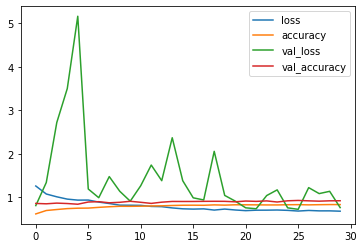

In [27]:
df2.plot()

### Inference : 

- Accuracy : 0.9226
- Loss : 0.7649

In [13]:
## Q : 3)

model_3 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(300,activation = 'relu'),
    BatchNormalization(),
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10 , activation = 'softmax')
    
])

model_3.compile( loss = 'sparse_categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

history_3 = model_3.fit(X_train , y_train , validation_data = validation_set , epochs = 30 , batch_size = 32 ) 


Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.2164 - accuracy: 0.9340 - val_loss: 0.1081 - val_accuracy: 0.9682
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1095 - accuracy: 0.9668 - val_loss: 0.0944 - val_accuracy: 0.9736
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9729 - val_loss: 0.0802 - val_accuracy: 0.9770
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9775 - val_loss: 0.0736 - val_accuracy: 0.9794
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0700 - val_accuracy: 0.9798
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9831 - val_loss: 0.0678 - val_accuracy: 0.9826
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0428 - accuracy: 0.9857 - val_loss: 0.0779 - val_accuracy:

In [28]:
df3 = pd.DataFrame(history_3.history)
df3

,loss,accuracy,val_loss,val_accuracy
0,0.216404,0.933982,0.108117,0.9682
1,0.109510,0.966764,0.094429,0.9736
2,0.085735,0.972891,0.080205,0.9770
3,0.067139,0.977491,0.073574,0.9794
4,0.059516,0.980982,0.069999,0.9798
5,0.050119,0.983127,0.067753,0.9826
6,0.042753,0.985727,0.077851,0.9816
7,0.039054,0.987200,0.073546,0.9806
8,0.035221,0.988345,0.082711,0.9830
9,0.029460,0.990036,0.084813,0.9804


<AxesSubplot:>

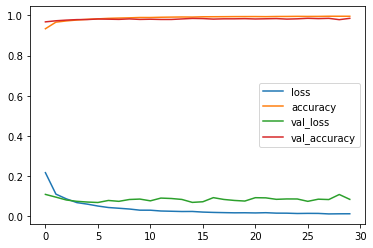

In [29]:
df3.plot()

### Inference : 

- Accuracy : 0.9858
- Loss : 0.0833

In [14]:
## Q : 3)

model_4 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(300,activation = 'relu'),
    BatchNormalization(),
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10 , activation = 'softmax')
    
])

model_4.compile( loss = 'sparse_categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

history_4 = model_4.fit(X_train , y_train , validation_data = validation_set , epochs = 30 , batch_size = 64 ) 


Epoch 1/30
860/860 [==============================] - 3s 3ms/step - loss: 0.2044 - accuracy: 0.9384 - val_loss: 0.1023 - val_accuracy: 0.9694
Epoch 2/30
860/860 [==============================] - 2s 3ms/step - loss: 0.0923 - accuracy: 0.9713 - val_loss: 0.0852 - val_accuracy: 0.9738
Epoch 3/30
860/860 [==============================] - 2s 3ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 0.0834 - val_accuracy: 0.9728
Epoch 4/30
860/860 [==============================] - 2s 3ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0768 - val_accuracy: 0.9794
Epoch 5/30
860/860 [==============================] - 2s 3ms/step - loss: 0.0416 - accuracy: 0.9865 - val_loss: 0.0725 - val_accuracy: 0.9806
Epoch 6/30
860/860 [==============================] - 2s 3ms/step - loss: 0.0342 - accuracy: 0.9888 - val_loss: 0.0690 - val_accuracy: 0.9820
Epoch 7/30
860/860 [==============================] - 2s 2ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0750 - val_accuracy: 0.9790
Epoch 

In [30]:
df4 = pd.DataFrame(history_4.history)
df4

,loss,accuracy,val_loss,val_accuracy
0,0.204413,0.938418,0.102314,0.9694
1,0.092301,0.971309,0.085189,0.9738
2,0.067055,0.978818,0.083423,0.9728
3,0.052598,0.983036,0.076764,0.9794
4,0.041612,0.986473,0.072545,0.9806
5,0.034217,0.988764,0.068971,0.9820
6,0.031402,0.989945,0.074990,0.9790
7,0.028816,0.990073,0.078445,0.9802
8,0.021621,0.992745,0.074954,0.9816
9,0.021688,0.992455,0.074261,0.9838


<AxesSubplot:>

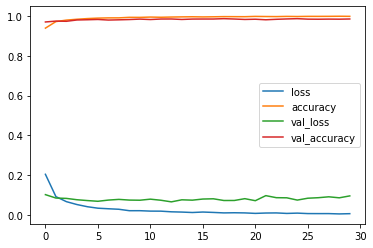

In [31]:
df4.plot()

### Inference :

- Accuracy : 0.9844
- Loss : 0.0959

# Conclusion : 

### Batch size : 2

- Accuracy : 0.9226
- Loss : 0.7649

### Batch size : 32

- Accuracy : 0.9858
- Loss : 0.0833

### Batch size : 64

- Accuracy : 0.9844
- Loss : 0.0959


- We can see that by using batch size 2 we get very less accuracy and also getting higher loss by 32 batch size accuracy increase and loss also decrease and after increase batch size 32 to 64 loss little bit increase and accuracy is also little bit decrease so in this condition we have 32 optimum batch size.
- We can also see stability also affected by batch size so identical batch size is too important for neural network .